In [98]:
#Dependencies
pip install tensorflow
pip install tensorflow-datasets
pip install matplotlib
pip install numpy
pip install ipywidgets

SyntaxError: invalid syntax (3214662907.py, line 2)

In [1]:
#Importing libraries
import tensorflow
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Reshape,LeakyReLU,Dropout,UpSampling2D

2024-03-31 20:43:42.876586: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Loading the tensorflow Fashion Mnist dataset and split it to train
ds=tfds.load("fashion_mnist",split="train")

In [3]:
#Then importing an iterator which will give us the values of the dataset one by one 
ds.as_numpy_iterator().next()

2024-03-31 20:43:54.752092: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [4]:
#Then checking the keys in our dataset
# -> images -> labels
ds.as_numpy_iterator().next().keys()

2024-03-31 20:43:56.030706: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


dict_keys(['image', 'label'])

In [5]:
#Iterating next image 
ds.as_numpy_iterator().next()["image"]

2024-03-31 20:43:57.185980: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

In [6]:
#Iterate through the second key of the dataset which is labels
ds.as_numpy_iterator().next()["label"]

2024-03-31 20:43:58.149208: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


2

In [7]:
#data iterator -> an iterator of data using numpy
dataiterator=ds.as_numpy_iterator()

In [8]:
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

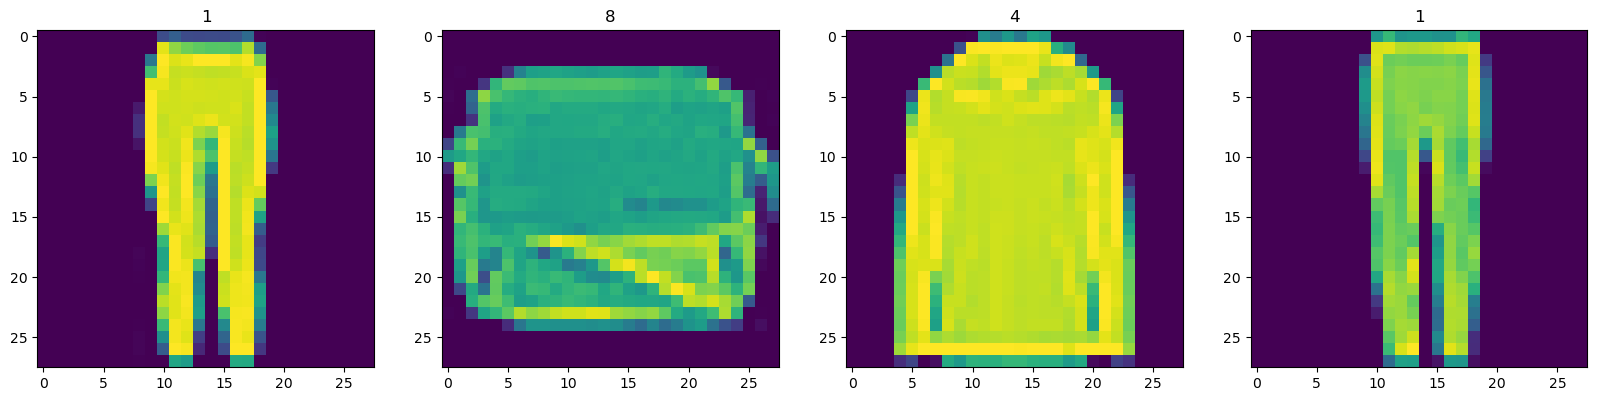

In [9]:
#Plotting the images with their subsequent labels
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
    sample=dataiterator.next()
    ax[idx].imshow(np.squeeze(sample["image"]))
    ax[idx].title.set_text(sample["label"])
    

In [10]:
#Scaling the images 
def scale_images(data):
    image= data["image"]
    return image/255

In [11]:
#Loading the data
ds=tfds.load("fashion_mnist",split="train")
#Mapping the scaled images
ds=ds.map(scale_images)
#Caching the images
ds=ds.cache()
#Then shuffling the images
ds=ds.shuffle(60000)
#Making the batches of the dataset
ds=ds.batch(128)
#then prefetching the images
ds=ds.prefetch(64)



In [12]:
#Checking the shape of the image
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [13]:
#Building the generator
def build_generator():
    model=Sequential()
    model.add(Dense(7*7*128,input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    
    
    
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding="same"))
    model.add(LeakyReLU(0.2))





    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding="same"))
    model.add(LeakyReLU(0.2))




    model.add(Conv2D(128,4,padding="same"))
    model.add(LeakyReLU(0.2))



    model.add(Conv2D(128,4,padding="same"))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(1,4,padding="same",activation="sigmoid"))
    
    
    
    
    
    
    return model

In [14]:
generator=build_generator()

/Users/book/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
#Checking summary of the model we made
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6272)           │       809,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
#Predicting the images
img=generator.predict(np.random.randn(4,128,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


In [17]:
img

array([[[[0.50106746],
         [0.5040225 ],
         [0.51086384],
         ...,
         [0.5012398 ],
         [0.50605774],
         [0.50360215]],

        [[0.5016383 ],
         [0.50190973],
         [0.5104927 ],
         ...,
         [0.50181556],
         [0.50734484],
         [0.5019437 ]],

        [[0.5010088 ],
         [0.49957302],
         [0.5087001 ],
         ...,
         [0.5127955 ],
         [0.50864905],
         [0.5007021 ]],

        ...,

        [[0.5072955 ],
         [0.5108136 ],
         [0.5081066 ],
         ...,
         [0.49902865],
         [0.49950165],
         [0.5033534 ]],

        [[0.50608873],
         [0.50894773],
         [0.5085211 ],
         ...,
         [0.4992303 ],
         [0.50053376],
         [0.5011767 ]],

        [[0.50061333],
         [0.4998344 ],
         [0.5016434 ],
         ...,
         [0.50060946],
         [0.50122774],
         [0.50048715]]],


       [[[0.4946208 ],
         [0.49804556],
         [0.50

In [18]:
#Checking the shape of the image
img.shape

(4, 28, 28, 1)

In [28]:
img=generator.predict(np.random.randn(4,128,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


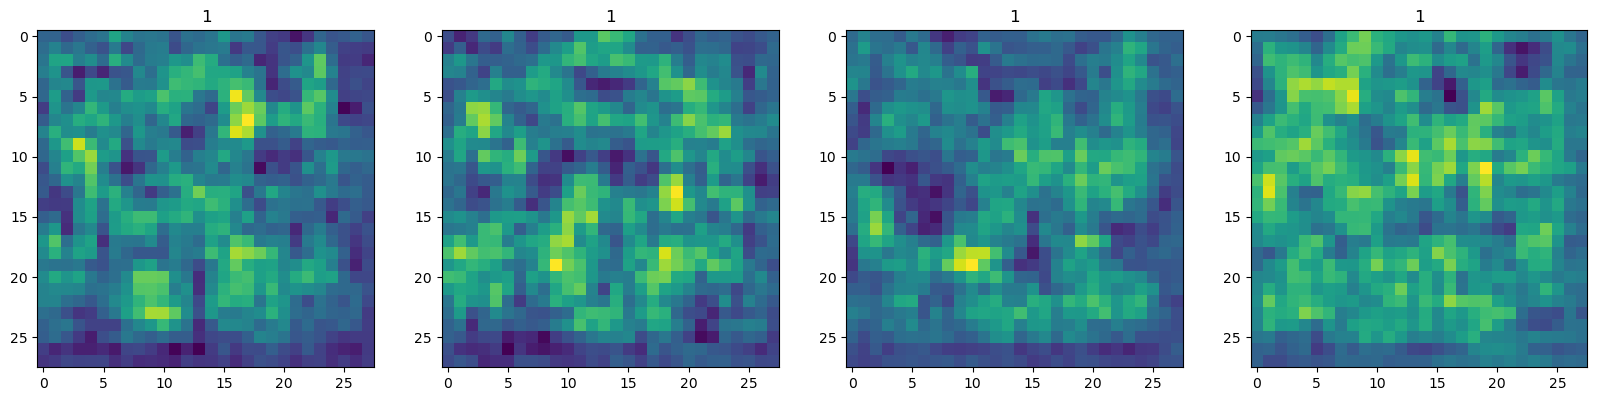

In [29]:
#Plotting the images
img=generator.predict(np.random.randn(4,128,1))

fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(img):
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(sample["label"])
    

In [30]:
#Building the discriminator
def build_discriminator():
    model=Sequential()
    
    
    
    model.add(Conv2D(32,5,input_shape=(28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))



    model.add(Conv2D(64,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))




    model.add(Conv2D(128,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))



    model.add(Conv2D(256,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))




    model.add(Flatten())
    model.add(Dropout(0.4))
    
    
    model.add(Dense(1,activation="sigmoid"))
    
    
    
    
    
    
    
    return model 

In [31]:
discriminator=build_discriminator()

In [32]:
#Checking summary of the discriminator
discriminator.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 20, 20, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        36,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
img=img[0]

In [33]:
img.shape

(28, 28, 1)

In [34]:
#We get value for 4 images
discriminator.predict(img)

ValueError: Exception encountered when calling Conv2D.call().

[1mNegative dimension size caused by subtracting 5 from 1 for '{{node sequential_2_1/conv2d_9_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_2_1/ExpandDims, sequential_2_1/conv2d_9_1/convolution/ReadVariableOp)' with input shapes: [28,28,1,1], [5,5,1,32].[0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(28, 28, 1, 1), dtype=float32)

In [35]:
#Expanding the dimension so that it predicts on value
discriminator.predict(np.expand_dims(img,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


array([[0.49773425]], dtype=float32)

In [36]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [37]:
g_opt = Adam(learning_rate=0.0001)
d_opt=Adam(learning_rate=0.00001)


g_loss=BinaryCrossentropy()
d_loss=BinaryCrossentropy()

In [38]:
from tensorflow.keras.models import Model

In [39]:
tensorflow.random.normal((6,128,1))

<tf.Tensor: shape=(6, 128, 1), dtype=float32, numpy=
array([[[-1.91968262e+00],
        [-8.16797018e-02],
        [-3.29161972e-01],
        [-1.65646291e+00],
        [ 5.90804935e-01],
        [ 3.25734437e-01],
        [ 1.92726123e+00],
        [ 1.10815957e-01],
        [ 4.71472412e-01],
        [-5.39757907e-01],
        [-1.30316615e+00],
        [-1.90088317e-01],
        [ 1.02648473e+00],
        [ 9.38966393e-01],
        [ 1.75486231e+00],
        [ 9.75745201e-01],
        [-6.56936228e-01],
        [ 9.53752548e-02],
        [ 7.55767941e-01],
        [ 3.32516044e-01],
        [-1.43645501e+00],
        [-9.96686161e-01],
        [ 6.50985777e-01],
        [ 1.15726793e+00],
        [-1.29930377e+00],
        [ 5.07074893e-01],
        [-8.13698471e-01],
        [ 3.65358889e-01],
        [ 1.54343545e+00],
        [-9.38182712e-01],
        [-1.52952388e-01],
        [ 1.02703309e+00],
        [-1.31152809e+00],
        [-8.67246270e-01],
        [ 7.17976272e-01],
  

In [40]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.generator = generator
        self.discriminator = discriminator
    
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        super().compile(*args, **kwargs)
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        real_images = batch
        fake_images = self.generator(tensorflow.random.normal((128, 128, 1)))

        with tensorflow.GradientTape() as d_tape:
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tensorflow.concat([yhat_real, yhat_fake], axis=0)
    
            y_realfake = tensorflow.concat([tensorflow.zeros_like(yhat_real), tensorflow.ones_like(yhat_fake)], axis=0)
            noise_real = 0.15 * tensorflow.random.uniform(tensorflow.shape(yhat_real))
            noise_fake = -0.15 * tensorflow.random.uniform(tensorflow.shape(yhat_fake))
            y_realfake += tensorflow.concat([noise_real, noise_fake], axis=0)
    
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
            self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
    
        with tensorflow.GradientTape() as g_tape:
            gen_images = self.generator(tensorflow.random.normal((128, 128, 1)))
            predicted_labels = self.discriminator(gen_images, training=False)
            total_g_loss = self.g_loss(tensorflow.zeros_like(predicted_labels), predicted_labels)
    
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
    
        return {"d_loss": total_d_loss, "g_loss": total_g_loss}

In [41]:
fashion_gan = FashionGAN(generator, discriminator)

In [42]:
fashion_gan.compile(g_opt = Adam(learning_rate=0.0001), d_opt=Adam(learning_rate=0.00001), g_loss=BinaryCrossentropy(), d_loss=BinaryCrossentropy())

In [43]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [44]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('/images', f'generated_img_{epoch}_{i}.png'))

In [ ]:
hist = fashion_gan.fit(ds, epochs=10, callbacks=[ModelMonitor()])

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

In [ ]:
generator.load_weights(os.path.join('archive', 'generatormodel.h5'))


In [ ]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))


In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [ ]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')